In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt 

# 1. OBTER DADOS HISTÓRICOS
ticker = 'BOVA11.SA'    # ETF IBOVESPA (B3)
start_date = '2020-01-01'
end_date = '2023-12-31'

# Buscar dados do yahoo finance
dados = yf.download(
    tickers=ticker,
    start=start_date,
    end=end_date,
    progress=False
)

### Preparar os dados

In [3]:
dados = dados[['Close']]    # Manter apenas preço de fechamento
dados.columns = ['Preco']   # Renomear coluna
dados = dados.dropna()  # Remover valores faltantes
dados['Retornos'] = dados['Preco'].pct_change() # Calcular retornos diários

### Calcular volatilidade rolling

In [6]:
janela_rolling = 21 # Janela de 21 dias úteis (1 mês)
dados['Volatilidade'] = (
    dados['Retornos'].rolling(window=janela_rolling).std()  # Desvio padrão
    * (252 ** 0.5)  # Anualização (252 dias úteis/ano)
)

### Visualização

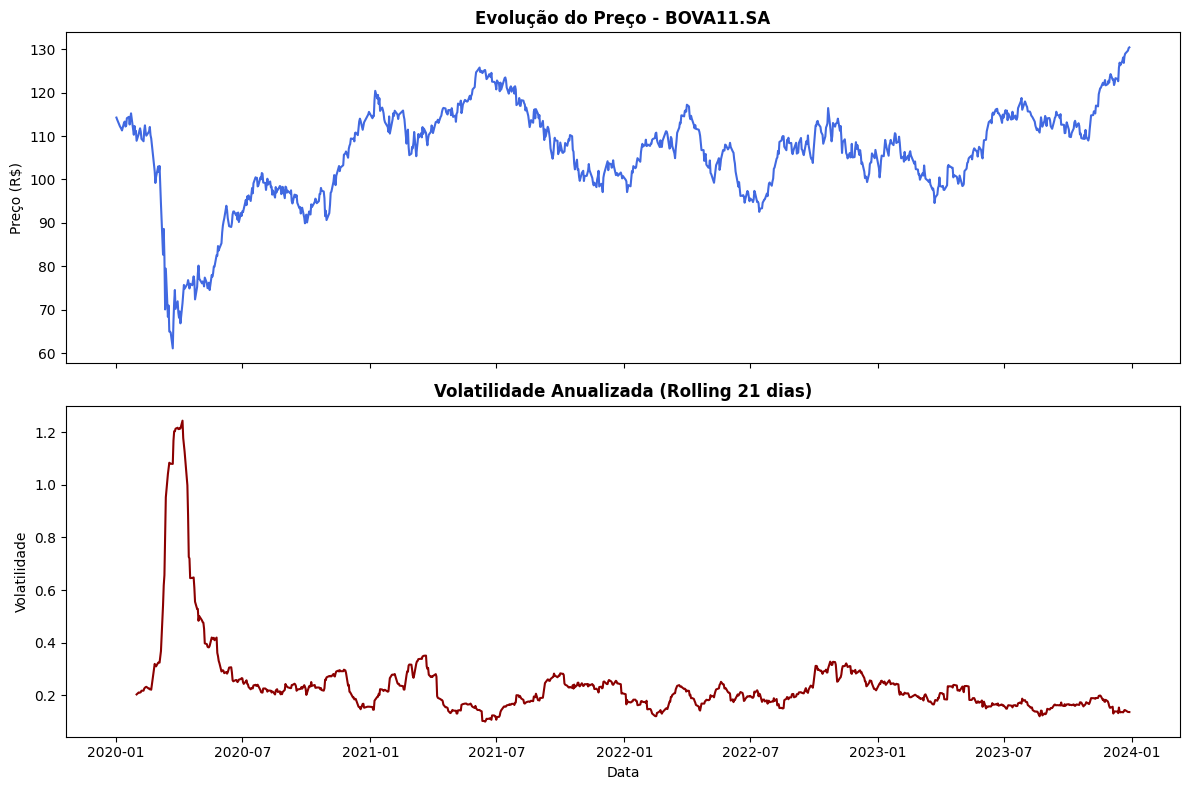

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Gráfico de preços
ax1.plot(dados['Preco'], color='royalblue')
ax1.set_title(f'Evolução do Preço - {ticker}', fontweight='bold')
ax1.set_ylabel('Preço (R$)')

# Gráfico de volatilidade
ax2.plot(dados['Volatilidade'], color='darkred')
ax2.set_title('Volatilidade Anualizada (Rolling 21 dias)', fontweight='bold')
ax2.set_ylabel('Volatilidade')
ax2.set_xlabel('Data')

plt.tight_layout()
plt.show()

# 5. EXPORTAR RESULTADOS (opcional)
dados.dropna().to_csv('volatilidade_fundo.csv', sep=';', decimal=',')